In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from irregular_backtesting.Backtest import single_Backtest
from irregular_backtesting.technical_anaysis import bollinger_percent, stochastic, intraday_intensity, moving_average, money_flow_index

In [20]:
etf_price  = pd.read_csv('data_directory/etf_price.csv', header=[0,1], index_col=0)
stock_price = pd.read_csv('data_directory/stock_price.csv', header=[0,1], index_col=0)

etf_price.index = list(map(str, etf_price.index))
stock_price.index = list(map(str, stock_price.index))

In [207]:
buy_ma = moving_average(param=[0,'up'], criterion = 'exponential')
buy_sto = stochastic(param = [30,'down'], criterion = 'D')
sell_ma = moving_average(param=[0,'down'], criterion = 'exponential')
sell_sto = stochastic(param = [70,'up'], criterion = 'D')
back_loss = single_Backtest(price_df = stock_price, stock='A000660', buy_estimators = [buy_ma,buy_sto], sell_estimators = [sell_ma,sell_sto], seed_money = 500000, breakout_buy=True)
back = single_Backtest(price_df = stock_price, stock='A000660', buy_estimators = [buy_ma,buy_sto], sell_estimators = [sell_ma,sell_sto], seed_money = 500000)

In [208]:

back.fit(start='201201',end='202111')
back_loss.fit(start='201201',end='202111')

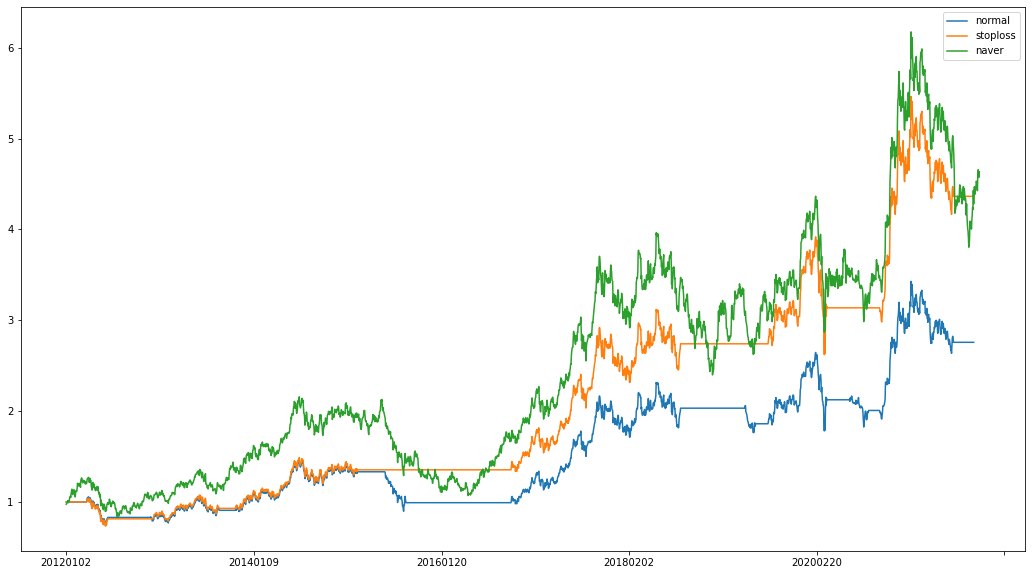

In [215]:
plt.figure(figsize=(18,10))
(back.balance.total/500000).plot(label='normal')
(back_loss.balance.total/500000).plot(label='stoploss')
(stock_price['closing_price']['A000660']/stock_price['closing_price']['A000660'].iloc[125]).plot(label='naver')
plt.legend()